L'dée de ce notebook est de pouvoir tracer les étapes de réalisation d'un calcul de temps de parcours de référence. Chap 1 : Import des données

In [272]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Chap 1. Extraction des données sur 48h

In [7]:
df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')#telecharger une partie des donnees sur unejournee

In [8]:
info_df_journee=t.df_source(df_journee)

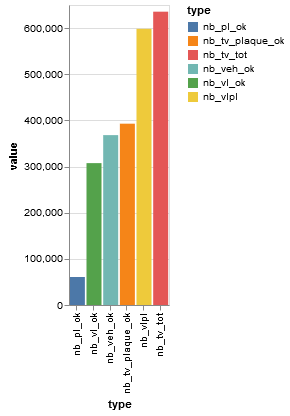

In [9]:
#graphes
graph_stat, graph_fiab=info_df_journee.plot_graphs()
#stats sur la journée
graph_stat

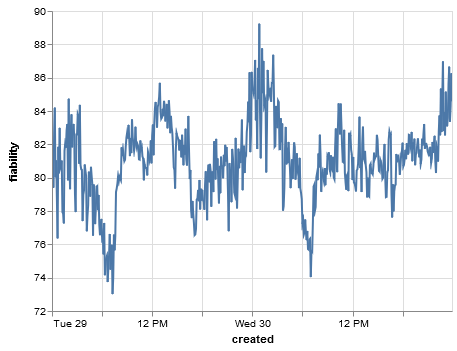

In [10]:
#fiabilité moyenne par tranche de 5 min (graph interactif)
graph_fiab

Chap 2. Trouver les échanges directs et indirects entre 2 caméras pour une tranche horaire de départ données

    Chap 2.1. Trouver les échanges indirects (par une camera intermediaire)

        Chap 2.1.1. Trouver les échanges entre les deux premieres cameras

In [11]:
#exempel sur le trajet A63 Cestas -> Rocade Est -> A10 DIRA

In [319]:
indirect_cam_19_4_5_19_4=t.df_tps_parcours(df_journee,'2019-01-29 07:00:00', 60, 16, 19,4) #création de l'instance entre les cameras 19 et 4

In [320]:
indirect_cam_19_4_5_19_4.df_tps_parcours_pl_final #la df des pl passés par les 2 cams
# attention, le code stocké prévoit que  : le typ de veh est 1 à chacune des 2 cameras, la fiabilite des cams est >80 sur chacune des cams

,immat,date_cam_1,cam_1,date_cam_2,cam_2,tps_parcours
80,997d5fbf94327159d8ad2dfe88999cf8a1a32fad,2019-01-29 07:41:57,19,2019-01-29 08:06:52,4,00:24:55
104,1da7ad5637f24c08d9a8bb1da3f932c21e8dd47c,2019-01-29 07:45:33,19,2019-01-29 08:11:08,4,00:25:35
136,c5d8d060de77fa2912482769266153d7d60c609d,2019-01-29 07:51:24,19,2019-01-29 08:15:10,4,00:23:46
146,382ff3d11f92aaa8d00c7e8061ff61c0eecbfc00,2019-01-29 07:53:24,19,2019-01-29 08:17:17,4,00:23:53
153,eb6b0e2bc49e9ea29fb491193621a90417323bf4,2019-01-29 07:54:19,19,2019-01-29 08:18:39,4,00:24:20
156,ac7d82c1c4904787d2c8e2ce5c7e9ffb3d42f72b,2019-01-29 07:54:43,19,2019-01-29 08:19:06,4,00:24:23
165,a7e4a67e8836b4fdb72688baca377534f6add717,2019-01-29 07:56:06,19,2019-01-29 08:21:30,4,00:25:24
171,b3e2b06a429608e99c98d074851e49cbb6fb93ad,2019-01-29 07:56:03,19,2019-01-29 08:22:20,4,00:26:17
175,c64f5c735c9cae0e6d3515e99f9459026a0fffae,2019-01-29 07:57:04,19,2019-01-29 08:23:27,4,00:26:23
176,f25b2cd42e0b20614640abc3418ec2af63af5042,2019-01-29 07:57:56,19,2019-01-29 08:23:30,4,00:25:34


In [88]:
graph_stat_trie, graph_brut, legende=indirect_cam_19_4_5_19_4.plot_graphs() #les graphs de répartition des vehicules et temps de passages

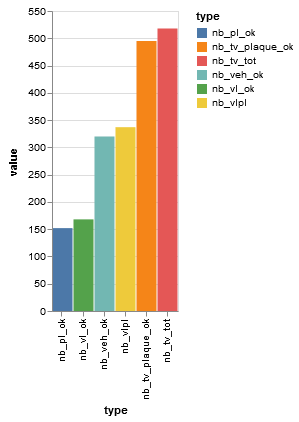

In [89]:
graph_stat_trie

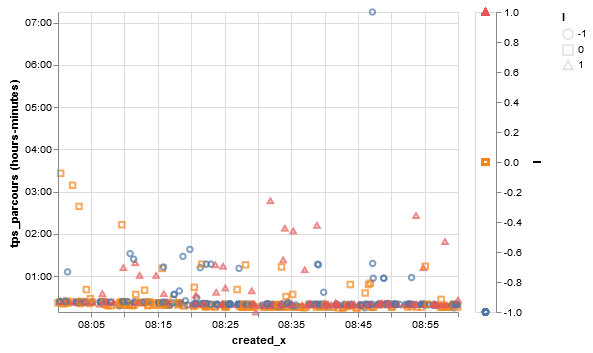

In [90]:
graph_brut | legende

        chap 2.1.2 : Trouver les échanges entre les 2 cameras suivantes

In [209]:
#recherche des trajets indirects entre 2 cameras
# on se base sur les temps de trajets trouvé sur les deux cameras precedente pour limiter la recherche des donnees
indirect_cam_19_4_5_4_5=t.recherche_trajet_indirect(df_journee,indirect_cam_19_4_5_19_4,16, 1,5)

In [210]:
indirect_cam_19_4_5_4_5

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours
0,18fda67fd50f38137a2732f3cf50575d63203bf9,2019-01-29 08:44:56,2019-01-29 12:53:39,19,5,04:08:43
1,4e3833473652932c01a07b0a1660943cc3125194,2019-01-29 08:47:54,2019-01-29 10:30:11,19,5,01:42:17


    Chap 2.2. Trouver les échanges directs

In [94]:
#et on reutilie la classe df_tps_parcours, qui ne renvoi que les immat qui passent directement par la seconde cameras 
#on pourrait utiliser les données de temps max collectées par les échanges indirect pour limiter les données, là je laisse la possibilité de prendre 16h plus tard
direct_cam19_5=t.df_tps_parcours(df_journee,'2019-01-29 08:00:00', 60, 16, 19,5)

In [206]:
direct_cam19_5.df_tps_parcours_pl_final#on pourrait aussi limiter les donnees obtenues selon les temps de parcours par trajet indirects

,immat,date_cam_1,cam_1,date_cam_2,cam_2,tps_parcours
0,7ca71703d969471beceb2ea5c7cf675c9e2bbf3c,2019-01-29 08:02:04,19,2019-01-29 08:36:58,5,00:34:54
3,05688c9f347397d71e843bec4be08deb738e9ce9,2019-01-29 08:07:36,19,2019-01-29 08:41:23,5,00:33:47
5,cb255482f4ef2287f2960b7f613f129c32ab0aab,2019-01-29 08:11:25,19,2019-01-29 08:44:54,5,00:33:29
6,2397fb7098303d72ca7f7ad2e3f761cced93dbdc,2019-01-29 08:14:52,19,2019-01-29 08:47:33,5,00:32:41
10,be874c36d30958a6ae091fbfbfa9830ce16f5c03,2019-01-29 08:33:11,19,2019-01-29 08:58:24,5,00:25:13
13,13c9b885389ad4d59feaaac9eec0b330349c33f4,2019-01-29 08:14:52,19,2019-01-29 09:01:13,5,00:46:21
14,885a144888cb53d5cab950ce62de2bd22faefb25,2019-01-29 08:31:20,19,2019-01-29 09:01:35,5,00:30:15
15,133c9bceac97b6e998fa438a4c674d5b3f74001b,2019-01-29 08:29:18,19,2019-01-29 09:01:36,5,00:32:18
22,00e0fefe9616459cbd1d7e7f0b89646322733752,2019-01-29 08:48:27,19,2019-01-29 09:14:52,5,00:26:25
24,ea0bb3ad86c5c202acdd11037621e15e2eb938a3,2019-01-29 08:12:21,19,2019-01-29 09:19:52,5,01:07:31


In [96]:
graoh1, praph2, legend2 =direct_cam19_5.plot_graphs()

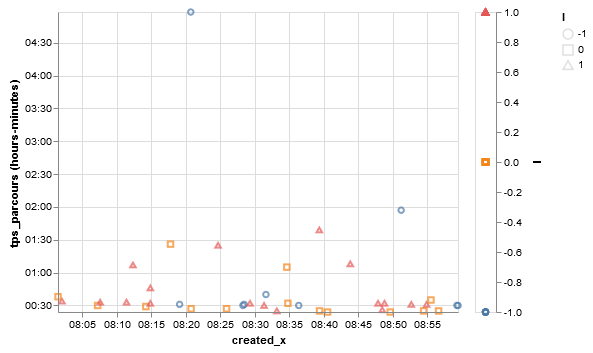

In [97]:
praph2 | legend2

Chap 2.3 Assembler les données 

In [98]:
# récupérer les données de trajet indirects et directs, puis concaténer et vérifier qu'il n'y a pasde doublons
cam_19_5=pd.concat([indirect_cam_19_4_5_4_5,direct_cam19_5.df_tps_parcours_pl_final], sort=False)

In [99]:
cam_19_5

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours
0,bf9dfd50a4a693085e3080156f11c25314f96f03,2019-01-29 08:00:56,2019-01-29 08:37:18,19,5,00:36:22
1,cf4f7ddbb3a6d9006e029777df712a53c2d76992,2019-01-29 08:01:07,2019-01-29 08:37:04,19,5,00:35:57
2,183bc8585ac5a2e26b6d2ada6ce6891235a36b92,2019-01-29 08:01:16,2019-01-29 08:37:20,19,5,00:36:04
3,dcf2ffa7638b1ae7d0281cbb94d4c7cf0a0912f7,2019-01-29 08:02:34,2019-01-29 08:37:42,19,5,00:35:08
4,54581cfa0b0f0c1dbe24fd60ca7efcc07439232f,2019-01-29 08:02:19,2019-01-29 08:38:07,19,5,00:35:48
5,31c6bdae383e5c4f25e803d55dc539d6c40e6105,2019-01-29 08:03:06,2019-01-29 08:38:16,19,5,00:35:10
6,77728d75d8ee8a1e27c95ca4077faddbf9dcdd93,2019-01-29 08:03:55,2019-01-29 08:38:48,19,5,00:34:53
7,59148b1dc67f7b2ca10635cd4fabe903b1fd0b63,2019-01-29 08:04:14,2019-01-29 08:39:21,19,5,00:35:07
8,3de49b107ce9b3f1add8f9314add9f5a2cadbe50,2019-01-29 08:05:07,2019-01-29 08:39:49,19,5,00:34:42
9,2a88c4e3e59236321a2098ccc9dd4b47f2eed478,2019-01-29 08:07:23,2019-01-29 08:42:27,19,5,00:35:04


TEST CHAINAGE DES FONCTIONS

In [190]:
#ça je dois pouvoir en faire u json et l'importer
liste_trajet=(pd.DataFrame({'o_d':'A63-A10','trajets':[[{'cameras':[19,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,5],'type_trajet':'direct'},
                                                      ]]}))

In [191]:
pd.set_option('display.width', 1000)

In [346]:
dates= pd.date_range('2019-01-29', periods=24, freq='H')
for date in dates : 
    date=date.strftime("%Y-%m-%d %H:%M:%S")
    for index, value in liste_trajet.iterrows() : 
        o_d, carac_trajet=value[0],value[1]
        for dico_carac in carac_trajet :
            cameras=dico_carac['cameras']
            type_t=dico_carac['type_trajet']
            if type_t=='indirect' : 
                indirect_cam_1_2=t.df_tps_parcours(df_journee,date, 60, 16, cameras[0], cameras[1])#parcourir entre les 2 premieres cams
                if indirect_cam_1_2.df_tps_parcours_pl_final.empty : #si le premier trajet ne présente pas de pl on quitte
                    break
                df_trajet=t.recherche_trajet_indirect(df_journee,indirect_cam_1_2, 16, cameras[1],cameras[2])#en deduire le total
            else :
                df_trajet=t.df_tps_parcours(df_journee,date, 60, 16, 19,5).df_tps_parcours_pl_final#por permettre le suivi et retrouver les camera intermediaires
            df_trajet['cameras']=str(cameras)#pour suivi possible
            if 'dico_od' in locals() :
                dico_od=pd.concat([dico_od,df_trajet], sort=False)
            else : 
                dico_od=df_trajet

In [347]:
dico_od

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours,cameras
0,997d5fbf94327159d8ad2dfe88999cf8a1a32fad,2019-01-29 07:41:57,2019-01-29 08:17:44,19,5,00:35:47,"[19, 4, 5]"
1,1da7ad5637f24c08d9a8bb1da3f932c21e8dd47c,2019-01-29 07:45:33,2019-01-29 08:22:36,19,5,00:37:03,"[19, 4, 5]"
2,382ff3d11f92aaa8d00c7e8061ff61c0eecbfc00,2019-01-29 07:53:24,2019-01-29 08:28:22,19,5,00:34:58,"[19, 4, 5]"
3,eb6b0e2bc49e9ea29fb491193621a90417323bf4,2019-01-29 07:54:19,2019-01-29 08:30:39,19,5,00:36:20,"[19, 4, 5]"
4,a7e4a67e8836b4fdb72688baca377534f6add717,2019-01-29 07:56:06,2019-01-29 08:32:54,19,5,00:36:48,"[19, 4, 5]"
5,b3e2b06a429608e99c98d074851e49cbb6fb93ad,2019-01-29 07:56:03,2019-01-29 08:34:34,19,5,00:38:31,"[19, 4, 5]"
6,f25b2cd42e0b20614640abc3418ec2af63af5042,2019-01-29 07:57:56,2019-01-29 08:34:25,19,5,00:36:29,"[19, 4, 5]"
7,2dca9f2506ef4f67da0255625f046d1b40348d6e,2019-01-29 07:58:35,2019-01-29 08:35:20,19,5,00:36:45,"[19, 4, 5]"
8,914a3afe6d6abb263b99c20884c88ae7c8a383dd,2019-01-29 07:59:36,2019-01-29 08:35:38,19,5,00:36:02,"[19, 4, 5]"
9,04cdedf0bf6f15c9698dce79ad3157720ea29448,2019-01-29 07:54:45,2019-01-29 10:26:17,19,5,02:31:32,"[19, 5]"
